In [1]:
import seaborn as sns # this is used for the plot the graph
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn import tree

In [2]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
# To import the svm classifier

from sklearn.metrics import classification_report #for classification report
from sklearn.metrics import confusion_matrix # to see the confusion matrix
from sklearn.metrics import accuracy_score # to find the accuracy
from sklearn.metrics import cohen_kappa_score # to check kappa
from sklearn.metrics import mean_squared_error # meansquared error
from sklearn.metrics import classification_report #to check the classification report

In [4]:
import pandas as pd
data = pd.read_csv('F:/NCI/Data mining/datasets/run_or_walk.csv')
print(data.head(6))

        date                time username  wrist  activity  acceleration_x  \
0  2017-6-30  13:51:15:847724020   viktor      0         0          0.2650   
1  2017-6-30  13:51:16:246945023   viktor      0         0          0.6722   
2  2017-6-30  13:51:16:446233987   viktor      0         0          0.4399   
3  2017-6-30  13:51:16:646117985   viktor      0         0          0.3031   
4  2017-6-30  13:51:16:846738994   viktor      0         0          0.4814   
5  2017-6-30   13:51:17:46806991   viktor      0         0          0.4044   

   acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  
0         -0.7814         -0.0076 -0.0590  0.0325 -2.9296  
1         -1.1233         -0.2344 -0.1757  0.0208  0.1269  
2         -1.4817          0.0722 -0.9105  0.1063 -2.4367  
3         -0.8125          0.0888  0.1199 -0.4099 -2.9336  
4         -0.9312          0.0359  0.0527  0.4379  2.4922  
5         -0.8056         -0.0956  0.6925 -0.2179  2.5750  


In [5]:
#print(data.info())

#data['Status'] = data['Status'].map({'TS':1,'HU':0})

#data.describe() # this will describe the all statistical function of our data

In [10]:
data.activity = pd.Categorical(data.activity)
data['activity'] = data.activity.cat.codes
print(data.head())

        date                time username  wrist  activity  acceleration_x  \
0  2017-6-30  13:51:15:847724020   viktor      0         0          0.2650   
1  2017-6-30  13:51:16:246945023   viktor      0         0          0.6722   
2  2017-6-30  13:51:16:446233987   viktor      0         0          0.4399   
3  2017-6-30  13:51:16:646117985   viktor      0         0          0.3031   
4  2017-6-30  13:51:16:846738994   viktor      0         0          0.4814   

   acceleration_y  acceleration_z  gyro_x  gyro_y  gyro_z  
0         -0.7814         -0.0076 -0.0590  0.0325 -2.9296  
1         -1.1233         -0.2344 -0.1757  0.0208  0.1269  
2         -1.4817          0.0722 -0.9105  0.1063 -2.4367  
3         -0.8125          0.0888  0.1199 -0.4099 -2.9336  
4         -0.9312          0.0359  0.0527  0.4379  2.4922  


In [6]:
data.activity.unique()

array([0, 1], dtype=int64)

In [12]:
data.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

NameError: name 'plt' is not defined

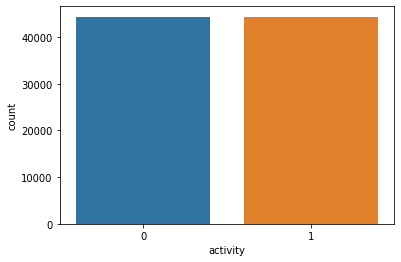

In [7]:
# lets get the frequency of activity
sns.countplot(data['activity'],label="Count")
plt.show()

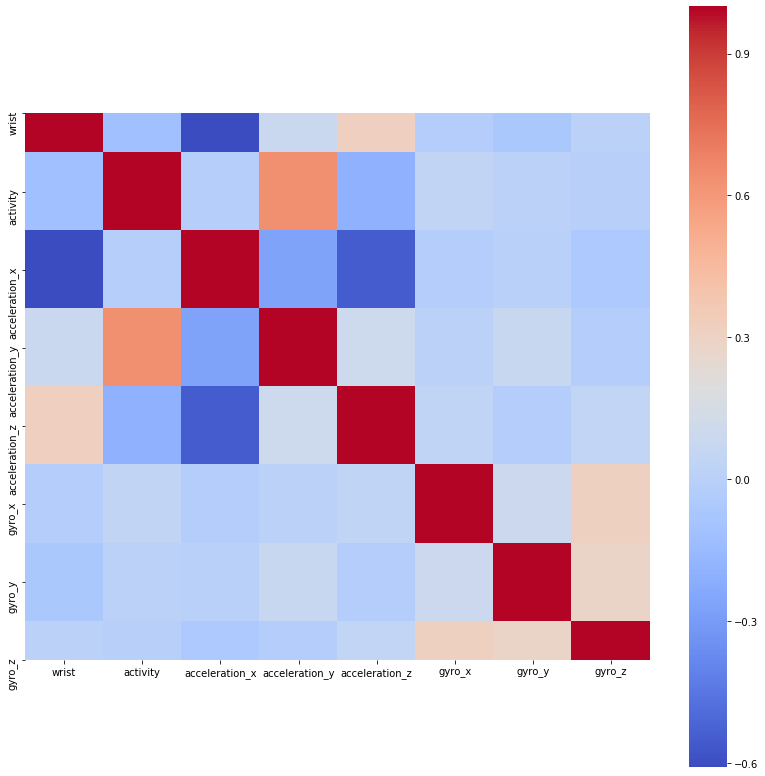

In [14]:
corr = data.corr() # .corr is used to find the correlation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True,
            cmap= 'coolwarm')
plt.show()

In [8]:
data.corr()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
wrist,1.000000,-0.113404,-0.609579,0.087091,0.323680,-0.022092,-0.068403,0.008796
activity,-0.113404,1.000000,-0.017747,0.639520,-0.192435,0.040856,0.012055,-0.008106
acceleration_x,-0.609579,-0.017747,1.000000,-0.265169,-0.552374,-0.021705,-0.004091,-0.060849
acceleration_y,0.087091,0.639520,-0.265169,1.000000,0.106220,0.010549,0.072170,-0.022994
acceleration_z,0.323680,-0.192435,-0.552374,0.106220,1.000000,0.035296,-0.021004,0.049621
gyro_x,-0.022092,0.040856,-0.021705,0.010549,0.035296,1.000000,0.094011,0.317769
gyro_y,-0.068403,0.012055,-0.004091,0.072170,-0.021004,0.094011,1.000000,0.287244
gyro_z,0.008796,-0.008106,-0.060849,-0.022994,0.049621,0.317769,0.287244,1.000000


In [9]:
random.seed(2)
pred_columns = data[:]
pred_columns.drop(['date'],axis=1,inplace=True)
pred_columns.drop(['time'],axis=1,inplace=True)
pred_columns.drop(['username'],axis=1,inplace=True)
#pred_columns.drop(['Longitude'],axis=1,inplace=True)
pred_columns.drop(['wrist'],axis=1,inplace=True)
pred_columns.drop(['activity'],axis=1,inplace=True)
#pred_columns.drop(['Date'],axis=1,inplace=True)
#pred_columns.drop(['Time'],axis=1,inplace=True)
prediction_var = pred_columns.columns
print(list(prediction_var))

['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
# now these are the variables which will use for prediction
#now split our data into train and test

In [11]:
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(62011, 11)
(26577, 11)


In [12]:
train_X = train[prediction_var]# taking the training data input
train_y= train['activity']# This is output of our training data
#print(list(data.columns))
print(list(train.columns))

['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']


In [13]:
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test['activity']   #output value of test dat

In [14]:
#RandomForest classifier
model=RandomForestClassifier(n_estimators=100)# a simple random forest model
model.fit(train_X,train_y)# now fit our model for traiing data
prediction=model.predict(test_X)# predict for the test data
#prediction will contain the predicted value by our model predicted values of diagnosis column for test inputs
print(metrics.accuracy_score(prediction,test_y)) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

0.9876961282311774


In [15]:
prediction=model.predict(test_X)# predict for the test data
# prediction will contain the predicted value by our model predicted values of diagnosis column for test inputs

In [16]:
df=pd.DataFrame(prediction,test_y)
print(df)

          0
activity   
0         0
0         0
1         1
1         1
1         1
...      ..
0         0
0         0
1         1
0         0
0         0

[26577 rows x 1 columns]


In [17]:
#Classification report
print(classification_report(test_y,prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13292
           1       0.99      0.99      0.99     13285

    accuracy                           0.99     26577
   macro avg       0.99      0.99      0.99     26577
weighted avg       0.99      0.99      0.99     26577



In [18]:
#Confusion matrix
confusion_matrix(test_y,prediction)

array([[13146,   146],
       [  181, 13104]], dtype=int64)

In [19]:
print(metrics.accuracy_score(test_y,prediction)) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

0.9876961282311774


In [20]:
#Kappa
cohen_kappa_score(test_y,prediction)

0.9753922376843702

In [21]:
#Mean squared error
mean_squared_error(test_y,prediction)

0.012303871768822666